In [519]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as plty 
%matplotlib inline
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_absolute_percentage_error
import warnings 
warnings.filterwarnings("ignore")

In [520]:
df=pd.read_csv(r"C:\Users\USER\Downloads\monthly_milk_production (2).csv",index_col="Date",parse_dates=True) #importing data

In [521]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [522]:
df.isnull().sum() #checking for the numll values

Production    0
dtype: int64

In [523]:
df.info() #dataset informations

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [524]:
df.columns #data columns

Index(['Production'], dtype='object')

In [525]:
df.value_counts() #value counts

Production
740           2
722           2
734           2
756           2
773           2
             ..
947           1
957           1
961           1
966           1
969           1
Name: count, Length: 142, dtype: int64

In [526]:
df.describe() #sunmmary statistics

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


<Axes: >

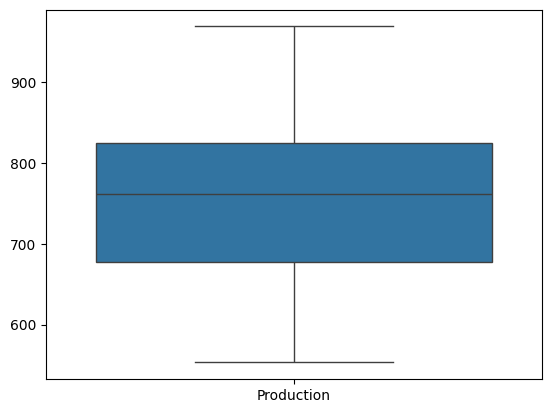

In [527]:
sns.boxplot(df) #checking foe outliers using boxplots

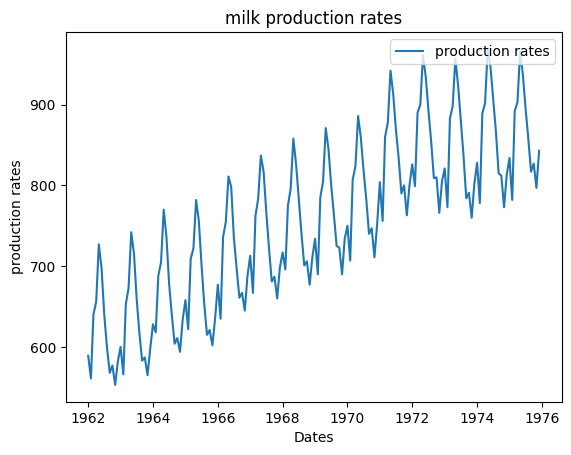

In [528]:
plt.plot(df["Production"],label="production rates") # checking behaviour of the data
plt.xlabel("Dates")
plt.ylabel("production rates")
plt.title("milk production rates")
plt.legend(loc="upper right")
plt.show()

In [529]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [530]:
seasonals=seasonal_decompose(df["Production"],model="mul",period=30)

In [531]:
trends=seasonals.trend #components of time series analysis
seasonalities=seasonals.seasonal
residuals=seasonals.resid

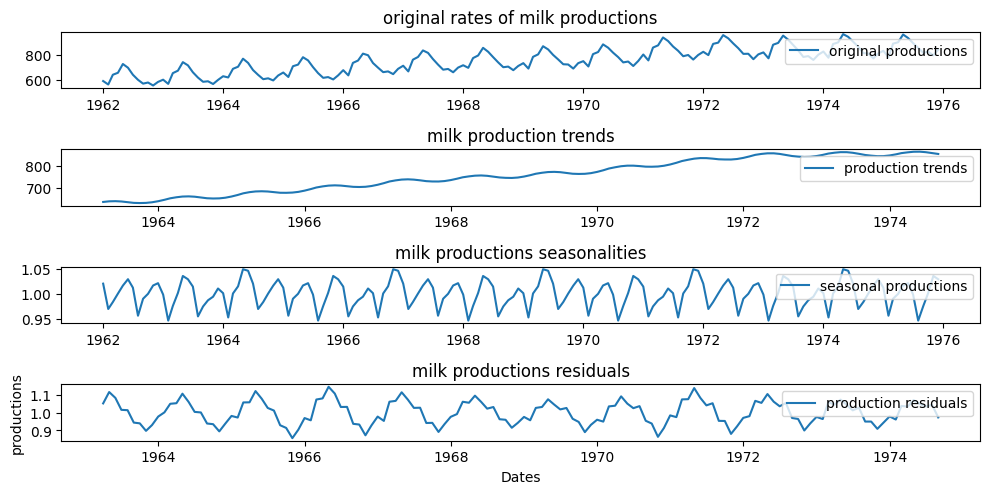

In [532]:
plt.figure(figsize=(10,6))
plt.subplot(512)
plt.plot(df["Production"],label="original productions")
plt.title("original rates of milk productions")
plt.legend(loc="upper right")
plt.subplot(513)
plt.plot(trends,label="production trends")
plt.title("milk production trends")
plt.legend(loc="upper right")
plt.subplot(514)
plt.plot(seasonalities,label="seasonal productions")
plt.title("milk productions seasonalities")
plt.legend(loc="upper right")
plt.subplot(515)
plt.plot(residuals,label="production residuals")
plt.title("milk productions residuals")
plt.xlabel("Dates")
plt.ylabel("productions")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [533]:
data=df[["Production"]]

In [534]:
data

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [535]:
scalers=MinMaxScaler(feature_range=(0,1)) #scaling the deatures

In [536]:
scaled_data=scalers.fit_transform(data)

In [537]:
#data preprocessing
x=[]
y=[]
for i in range(12,len(scaled_data)):
    x.append(scaled_data[i-12:i,0])
    y.append(scaled_data[i,0])

In [538]:
x=np.array(x)
y=np.array(y)

In [539]:
x.shape

(156, 12)

In [540]:
y.shape

(156,)

In [541]:
split_data=int(len(x)*0.8)

In [542]:
split_data

124

In [543]:
#splitting the data into training and testings
x_train,x_test=x[:split_data],x[split_data:] 
y_train,y_test=y[:split_data],y[split_data:]

In [544]:
x_train.shape

(124, 12)

In [545]:
x_test.shape

(32, 12)

In [546]:
y_train.shape

(124,)

In [547]:
y_test.shape

(32,)

In [548]:
x_trains=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #reshaping the training and testing data
x_tests=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [549]:
x_trains.shape

(124, 12, 1)

In [550]:
x_tests.shape

(32, 12, 1)

RNN

In [597]:
rnn=keras.Sequential()
rnn.add(keras.layers.SimpleRNN(units=64,input_shape=(12,1),return_sequences=True))
rnn.add(keras.layers.Dropout(0.2))
rnn.add(keras.layers.SimpleRNN(units=64))
rnn.add(keras.layers.Dropout(0.2))
rnn.add(keras.layers.Dense(units=1))

In [598]:
rnn.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="mean_squared_error")

In [599]:
history=rnn.fit(x_trains,y_train,epochs=100,batch_size=12,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2762
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1309 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0767 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0280 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0245 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0186 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

In [600]:
rnn.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_21 (SimpleRNN)            │ (None, 12, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_22 (SimpleRNN)            │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,637 (147.02 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,092 (98.02 KB)

In [601]:
y_preds=rnn.predict(x_tests)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


In [602]:
y_predicts=y_preds.reshape(-1,1)
y_tests=y_test.reshape(-1,1)

In [603]:
rnn_preds=scalers.inverse_transform(y_predicts)
y_testss=scalers.inverse_transform(y_tests)

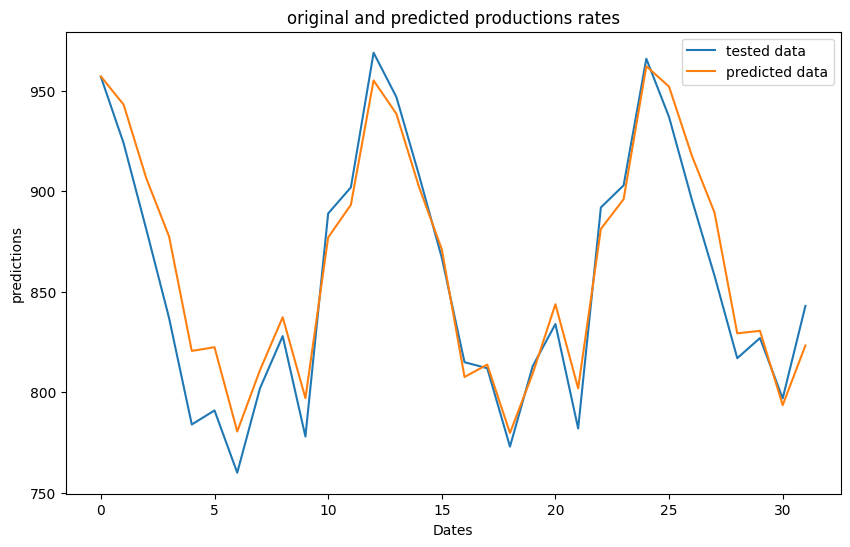

In [604]:
plt.figure(figsize=(10,6))
plt.plot(y_testss,label="tested data")
plt.plot(rnn_preds,label="predicted data")
plt.title("original and predicted productions rates")
plt.xlabel("Dates")
plt.ylabel("predictions")
plt.legend(loc="upper right")
plt.show()

In [605]:
mean_squared_error(y_testss,rnn_preds)

297.74635502684384

In [606]:
np.sqrt(mean_squared_error(y_testss,rnn_preds))

np.float64(17.25532830828912)

In [607]:
mean_absolute_error(y_testss,rnn_preds)

13.828573226928707

In [608]:
mean_absolute_percentage_error(y_testss,rnn_preds)

0.016436192085027064

In [609]:
r2_score(y_testss,rnn_preds)

0.920199788900321

LSTMM

In [610]:
lstm=keras.Sequential()
lstm.add(keras.layers.LSTM(units=64,input_shape=(12,1),return_sequences=True))
lstm.add(keras.layers.Dropout(0.2))
lstm.add(keras.layers.LSTM(units=64))
lstm.add(keras.layers.Dropout(0.2))
lstm.add(keras.layers.Dense(units=1))

In [611]:
lstm.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="mean_squared_error")

In [612]:
history2=lstm.fit(x_trains,y_train,epochs=100,batch_size=12, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1189
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0344
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0303 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0256
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0264
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0298 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0282
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0256 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0259
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0246
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0242  
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0223 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0278 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - lo

In [613]:
y_preds=lstm.predict(x_tests)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


In [614]:
y_predicts=y_preds.reshape(-1,1)
y_tests=y_test.reshape(-1,1)

In [615]:
lstm_predictions=scalers.inverse_transform(y_predicts)
y_testss=scalers.inverse_transform(y_tests)

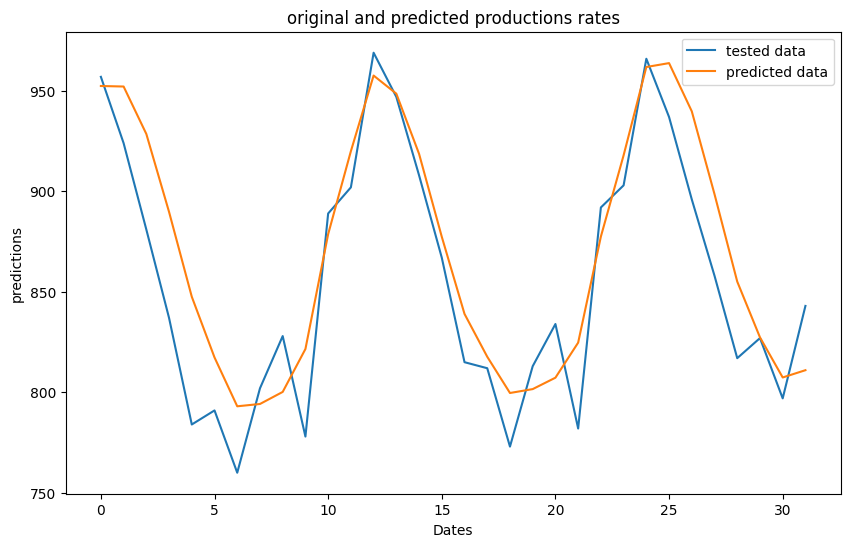

In [616]:
plt.figure(figsize=(10,6))
plt.plot(y_testss,label="tested data")
plt.plot(lstm_predictions,label="predicted data")
plt.title("original and predicted productions rates")
plt.xlabel("Dates")
plt.ylabel("predictions")
plt.legend(loc="upper right")
plt.show()

In [617]:
mean_squared_error(y_testss,lstm_predictions)

828.7083867090982

In [618]:
np.sqrt(mean_squared_error(y_testss,lstm_predictions))

np.float64(28.787295578242468)

In [619]:
mean_absolute_error(y_testss,lstm_predictions)

23.764280319213857

In [620]:
mean_absolute_percentage_error(y_testss,lstm_predictions)

0.02843396938503527

In [623]:
r2_score(y_testss,lstm_predictions)

0.7778944961610081

GRU

In [630]:
gru=keras.Sequential()
gru.add(keras.layers.GRU(units=64,input_shape=(12,1),return_sequences=True))
gru.add(keras.layers.Dropout(0.2))
gru.add(keras.layers.GRU(units=64))
gru.add(keras.layers.Dropout(0.2))
gru.add(keras.layers.Dense(units=1))

In [631]:
gru.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="mean_squared_error")

In [632]:
history3=gru.fit(x_trains,y_train,epochs=100,batch_size=12, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0825
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0304
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0252
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0248
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0257
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0219
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0237 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0228
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0224
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0210
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0179
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0173
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0161
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0133 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

In [633]:
y_preds=gru.predict(x_tests)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


In [634]:
y_predicts=y_preds.reshape(-1,1)
y_tests=y_test.reshape(-1,1)

In [635]:
gru_predictions=scalers.inverse_transform(y_predicts)
y_testss=scalers.inverse_transform(y_tests)

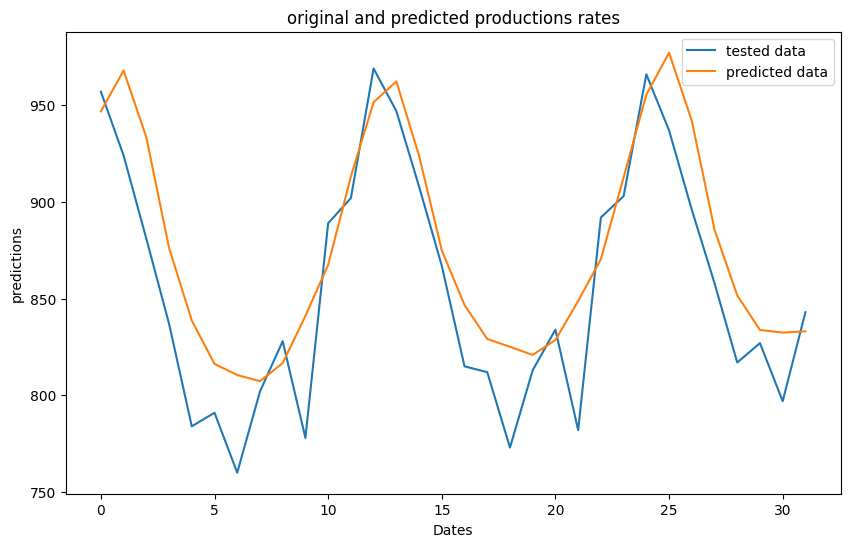

In [636]:
plt.figure(figsize=(10,6))
plt.plot(y_testss,label="tested data")
plt.plot(gru_predictions,label="predicted data")
plt.title("original and predicted productions rates")
plt.xlabel("Dates")
plt.ylabel("predictions")
plt.legend(loc="upper right")
plt.show()

In [637]:
mean_squared_error(y_testss,gru_predictions)

1076.0828258108809

In [638]:
np.sqrt(mean_squared_error(y_testss,gru_predictions))

np.float64(32.8037014041233)

In [639]:
mean_absolute_error(y_testss,gru_predictions)

27.156803131103505

In [640]:
mean_absolute_percentage_error(y_testss,gru_predictions)

0.032501422249495406

In [641]:
r2_score(y_testss,gru_predictions)

0.7115946670356199

RNN LSTM GRU MODELS PERFORMANCE COMPARISIONS

In [642]:
def models_evaluations(y_test,y_preds):
    mse=mean_squared_error(y_test,y_preds)
    rmse=np.sqrt(mean_squared_error(y_test,y_preds))
    mae=mean_absolute_error(y_test,y_preds)
    mape=mean_absolute_percentage_error(y_test,y_preds)
    r2_scores=r2_score(y_test,y_preds)
    return mse,rmse,mae,mape,r2_scores

In [643]:
rnn=models_evaluations(y_testss,rnn_preds)
lstm=models_evaluations(y_testss,lstm_predictions)
gru=models_evaluations(y_testss,gru_predictions)

In [644]:
rnn

(297.74635502684384,
 np.float64(17.25532830828912),
 13.828573226928707,
 0.016436192085027064,
 0.920199788900321)

In [645]:
lstm

(828.7083867090982,
 np.float64(28.787295578242468),
 23.764280319213857,
 0.02843396938503527,
 0.7778944961610081)

In [646]:
gru

(1076.0828258108809,
 np.float64(32.8037014041233),
 27.156803131103505,
 0.032501422249495406,
 0.7115946670356199)

In [647]:
results=pd.DataFrame({
    "models":["RNN","LSTM","GRU"],
    "MSE":[rnn[0],lstm[0],gru[0]],
    "RMSE":[rnn[1],lstm[1],gru[1]],
    "MAE":[rnn[2],lstm[2],gru[2]],
    "MAPE":[rnn[3],lstm[3],gru[3]],
    "R2_SCORES":[rnn[4],lstm[4],gru[4]]
})

In [648]:
print("RNN LSTM GRU MODEL PERFORMANCE MATRICES:\n",results)

RNN LSTM GRU MODEL PERFORMANCE MATRICES:
   models          MSE       RMSE        MAE      MAPE  R2_SCORES
0    RNN   297.746355  17.255328  13.828573  0.016436   0.920200
1   LSTM   828.708387  28.787296  23.764280  0.028434   0.777894
2    GRU  1076.082826  32.803701  27.156803  0.032501   0.711595


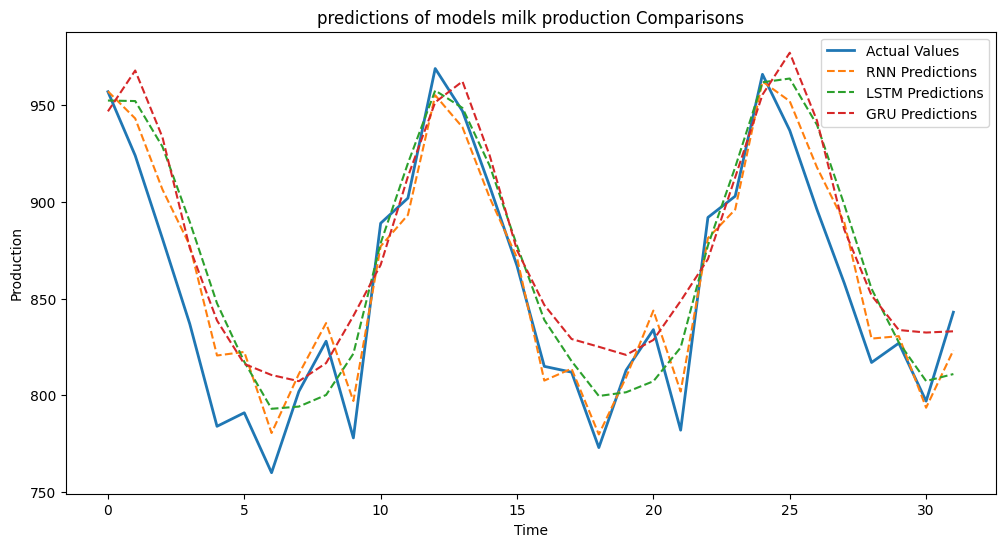

In [649]:
plt.figure(figsize=(12,6))
plt.plot(y_testss, label="Actual Values", linewidth=2)
plt.plot(rnn_preds, label="RNN Predictions", linestyle='--')
plt.plot(lstm_predictions, label="LSTM Predictions", linestyle='--')
plt.plot(gru_predictions, label="GRU Predictions", linestyle='--')
plt.title("predictions of models milk production Comparisons")
plt.xlabel("Time")
plt.ylabel("Production")
plt.legend()
plt.show()

FORECASTING FOR NEXT 12 MONTHS

In [657]:
forecasting_data=scaled_data[-12:]

In [658]:
forecasting_data=forecasting_data.reshape(1,12,1)

In [696]:
predicted_forecasts=[]
for i in range(12):
    predictions=rnn.predict(forecasting_data,verbose=0)[0][0]
    predicted_forecasts.append(predictions)
    forecasting_data=np.append(forecasting_data[:,1:,:],[[[predictions]]],axis=1)

In [697]:
predicted_forecasts=np.array(predicted_forecasts)

In [698]:
predicted_forecasts=predicted_forecasts.reshape(-1,1)

In [699]:
predicted_forecasts=scalers.inverse_transform(predicted_forecasts)

In [700]:
last_dates=data.index[-1]

In [707]:
Dates=pd.date_range(start=last_date,periods=13,freq="MS")[1:]

In [743]:
forecasted_values=pd.DataFrame({
    "Dates":Dates,
    "Forecasted_values":predicted_forecasts.flatten()
})

In [744]:
forecasted_values

,Dates,Forecasted_values
0,1976-01-01,834.487610
1,1976-02-01,817.915100
2,1976-03-01,877.468872
3,1976-04-01,887.650024
4,1976-05-01,938.610107
5,1976-06-01,932.449768
6,1976-07-01,909.674072
7,1976-08-01,891.149536
8,1976-09-01,839.992493
9,1976-10-01,846.446045


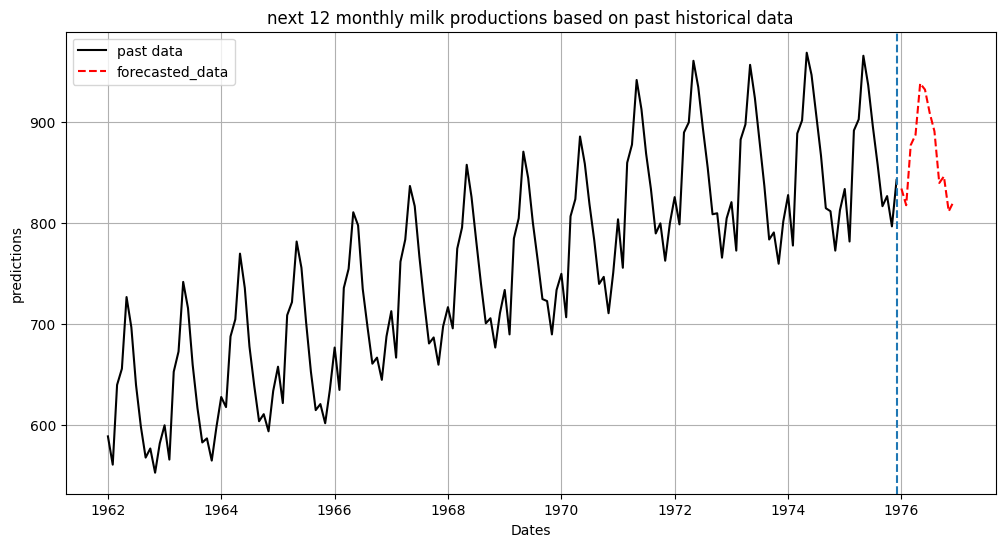

In [746]:
plt.figure(figsize=(12,6))
plt.plot(data.index,data,label="past data",color="black")
plt.plot(forecasted_values["Dates"],forecasted_values["Forecasted_values"],color="red",linestyle="--",label="forecasted_data")
plt.title("next 12 monthly milk productions based on past historical data")
plt.xlabel("Dates")
plt.ylabel("predictions")
plt.axvline(data.index[-1],linestyle="--")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

FORECASTING FOR NEXT 12 MONTHS WITH CI

In [765]:
forecasts_data=forcasted_values["Forecasted_values"]

In [760]:
lower_bounds=forecasts_data * 0.9
upper_bounds=forecasts_data * 1.1

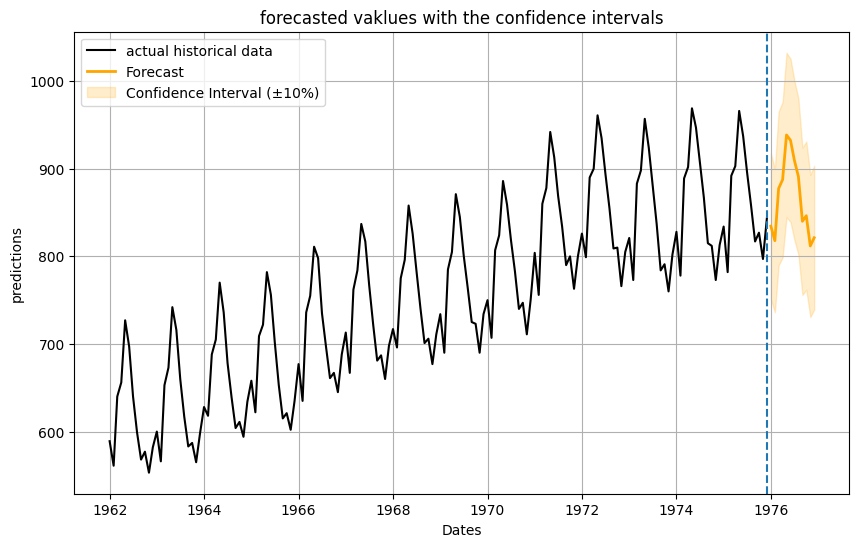

In [764]:
plt.figure(figsize=(10,6))
plt.plot(data.index,data,label="actual historical data",color="black")
plt.plot(forecasted_values['Dates'],  forecasted_values["Forecasted_values"],label='Forecast', color='orange', linewidth=2)
plt.fill_between(
    forecasted_values['Dates'], 
    lower_bound, 
    upper_bound, 
    color='orange', 
    alpha=0.2, 
    label='Confidence Interval (±10%)'
)

plt.title("forecasted vaklues with the confidence intervals")
plt.xlabel("Dates")
plt.ylabel("predictions")
plt.axvline(data.index[-1],linestyle="--")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

The model explains 92% of the variance in milk production , excellent accuracy.
MAPE < 2% means your forecasts are very close to real observed values.
Such a model is trustworthy for short-term planning up to 6–12 months.

1.Production Planning
Use the monthly forecasts to plan milk collection and processing capacity.
If production is expected to rise in upcoming months, schedule maintenance or staff training in low-production months.

2.Financial Forecasting & Inventory
Accurate milk output forecasts help plan cash flow, budgeting, and inventory storage.

3.Marketing & Distribution
Forecasts can be shared with distributors to negotiate better logistics and reduce transport costs.

4.Resource Allocation
Plan labor shifts, feed stock, and veterinary services based on predicted production.
Avoid overstaffing or under-utilization of resources.

5.Risk Management
Combine forecast with weather and feed price data to simulate what-if scenarios.